In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

In [2]:
def hls_threshold(image, ch = 's', thresh = (180,255)):
    
    hls = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    if(ch == 'h'):
        H = hls[:,:,0]
        h_binary = np.zeros_like(H)
        h_binary[(H>=thresh[0])&(H<=thresh[1])] = 1
        return h_binary
    elif(ch == 'l'):
        L = hls[:,:,1]
        l_binary = np.zeros_like(L)
        l_binary[(L>=thresh[0])&(L<=thresh[1])] = 1
        return l_binary
    else:
        S = hls[:,:,2]
        s_binary = np.zeros_like(S)
        s_binary[(S>=thresh[0])&(S<=thresh[1])] = 1
        return s_binary 

def rgb_threshold(image, ch = 'r', thresh = (180,255)):
    rgb = image
    if(ch == 'g'):
        G = rgb[:,:,1]
        g_binary = np.zeros_like(G)
        g_binary[(G>=thresh[0])&(G<=thresh[1])] = 1
        return g_binary
    elif(ch == 'b'):
        B = rgb[:,:,2]
        b_binary = np.zeros_like(B)
        b_binary[(B>=thresh[0])&(B<=thresh[1])] = 1
        return b_binary
    else:
        R = rgb[:,:,0]
        r_binary = np.zeros_like(R)
        r_binary[(R>=thresh[0])&(R<=thresh[1])] = 1
        return r_binary 
    

./test_images\straight_lines1.jpg


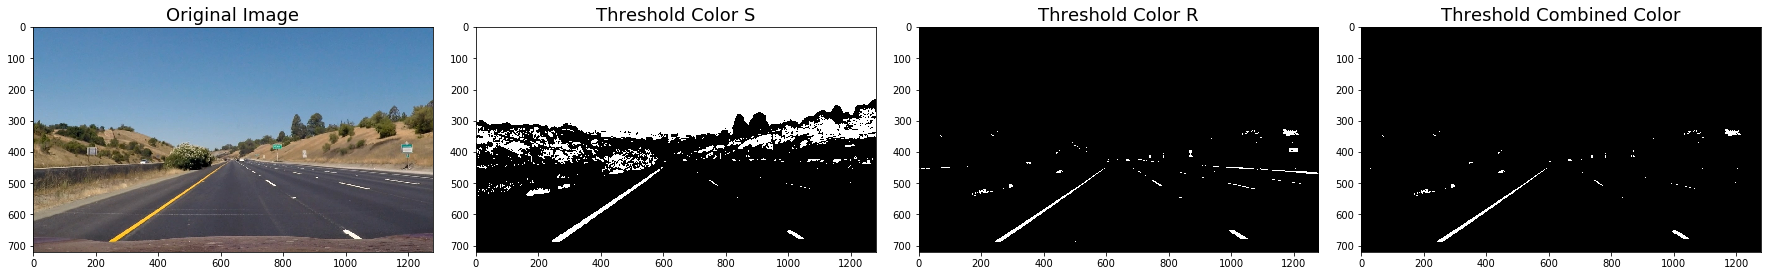

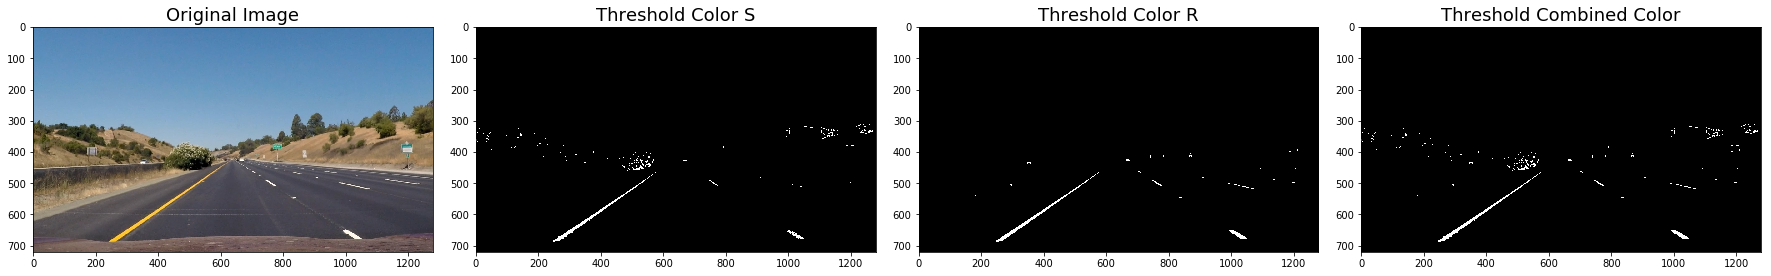

./test_images\straight_lines2.jpg


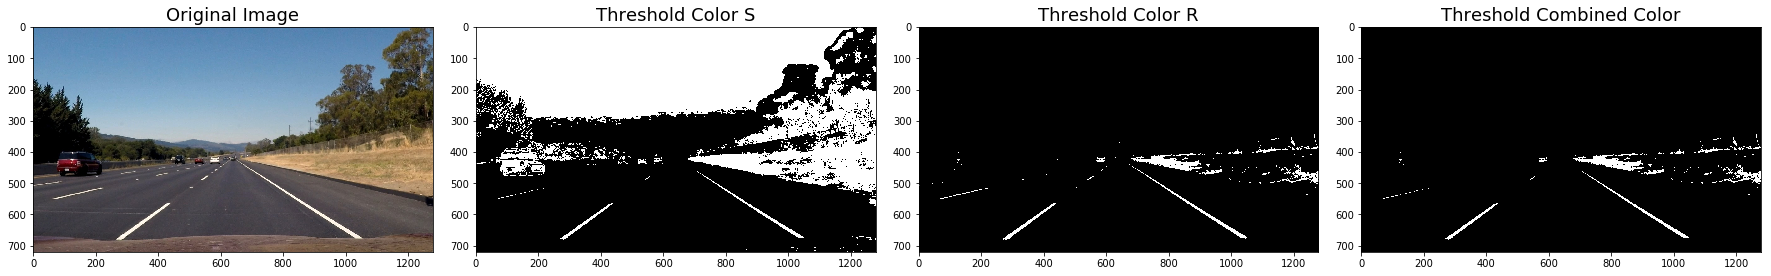

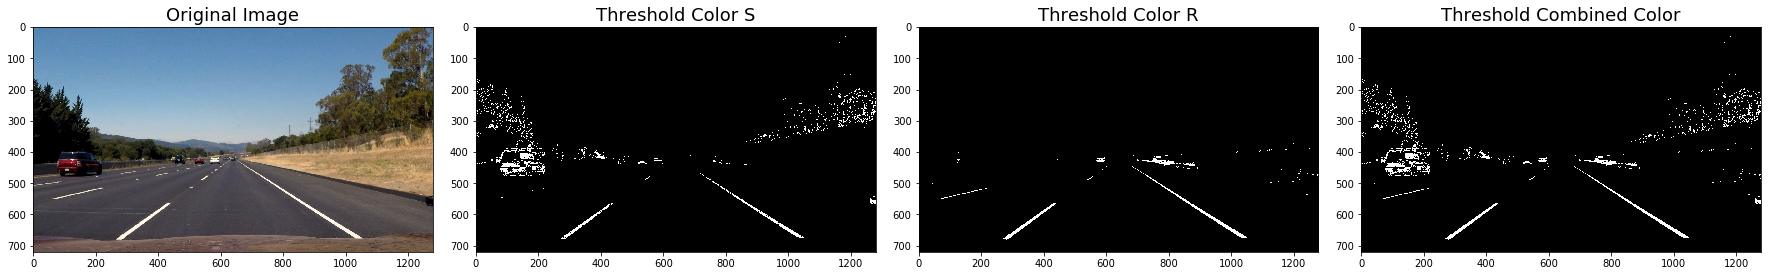

./test_images\test1.jpg


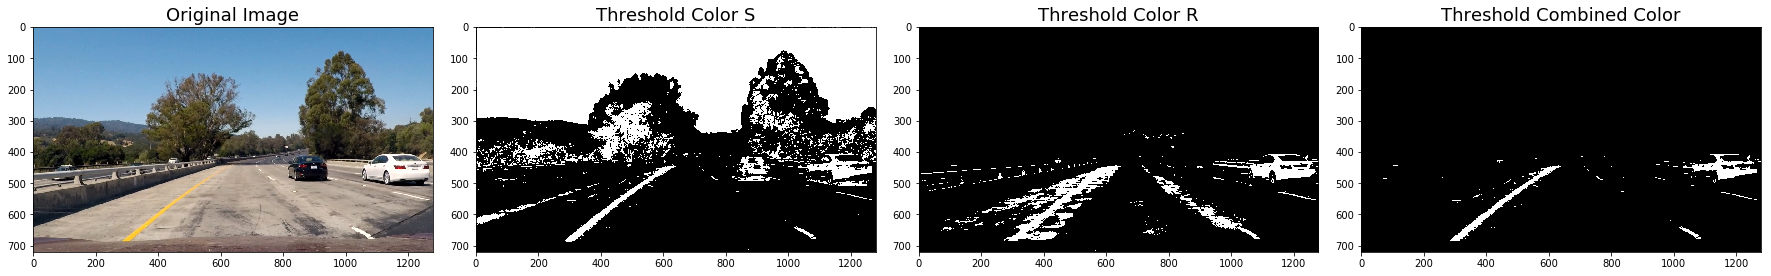

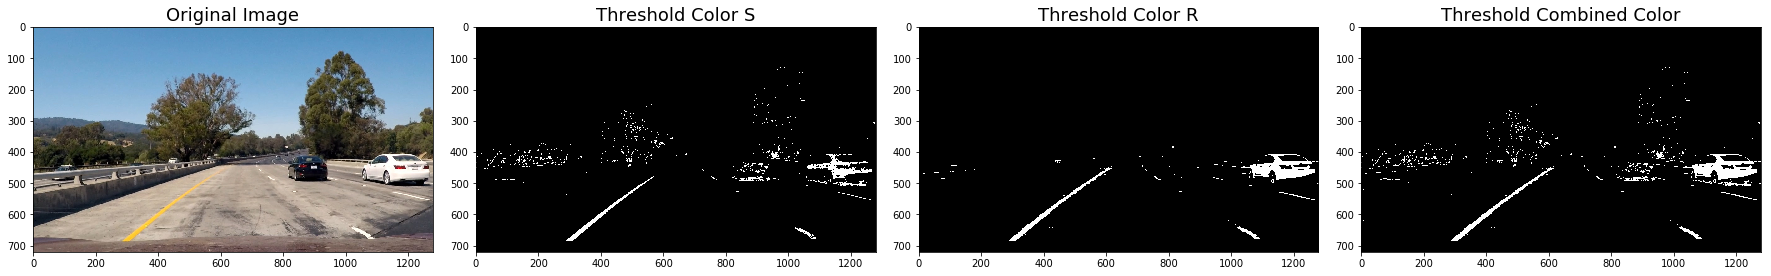

./test_images\test2.jpg


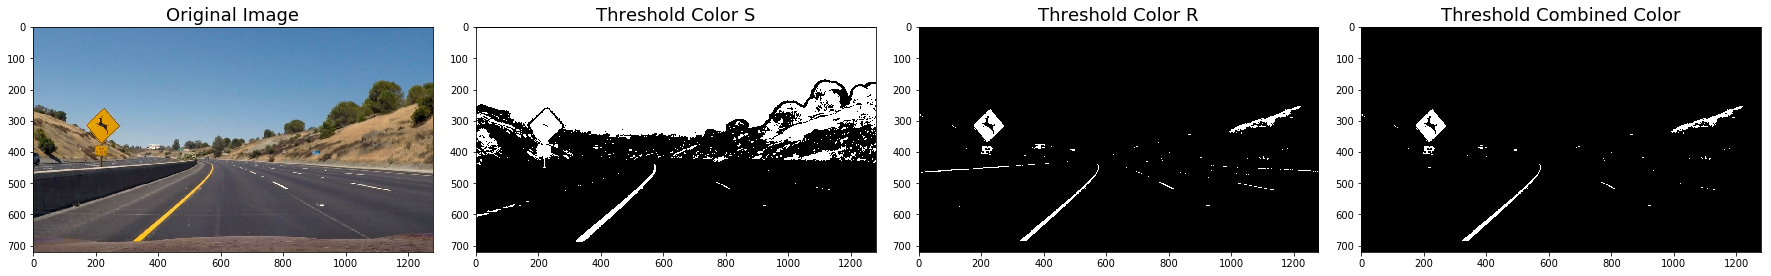

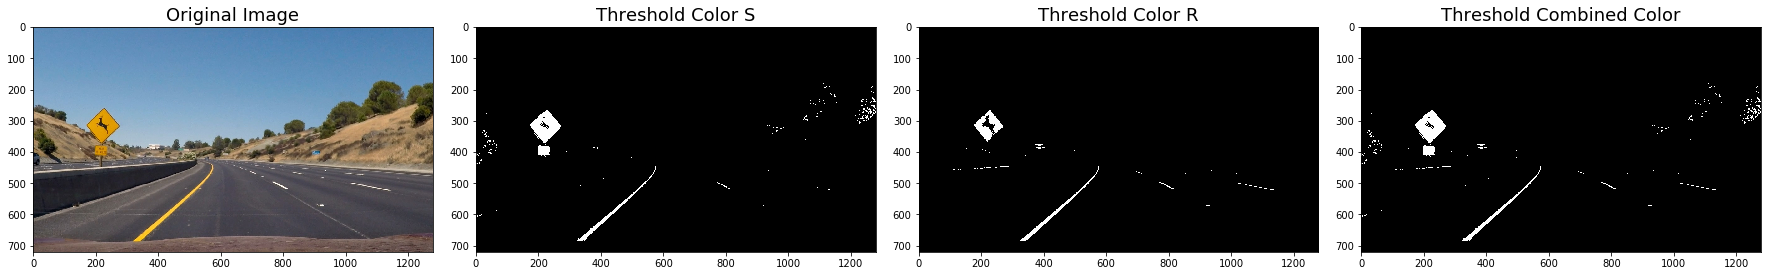

./test_images\test3.jpg


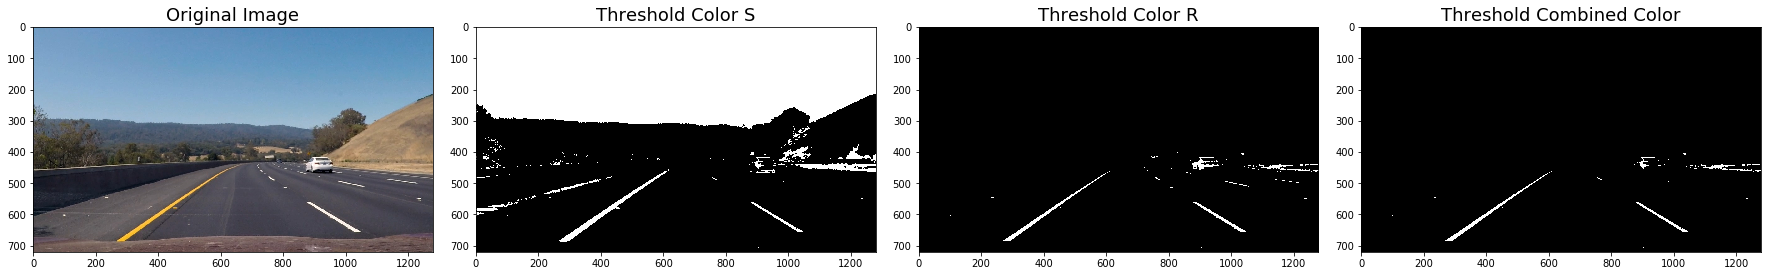

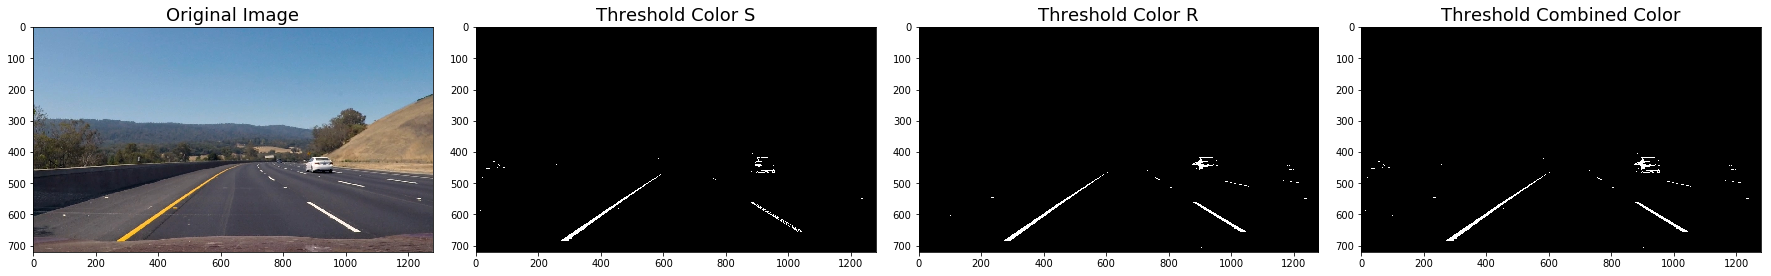

./test_images\test4.jpg


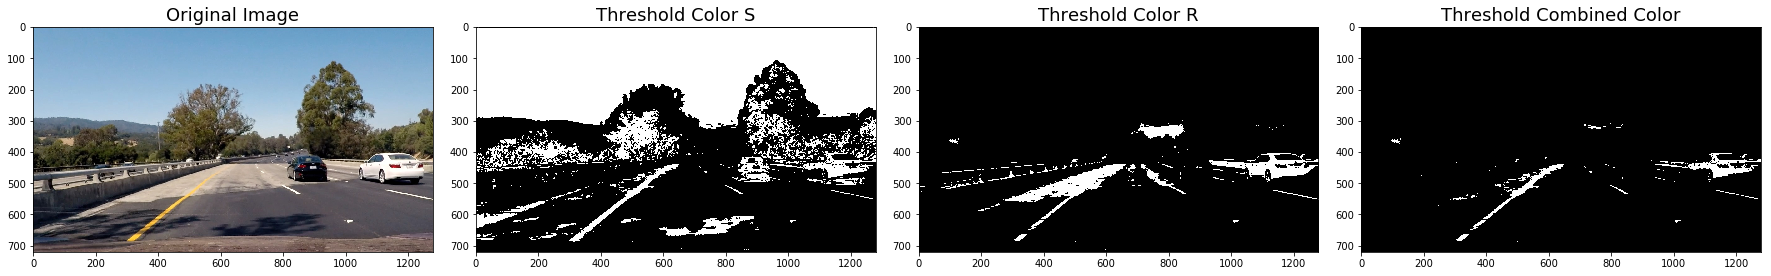

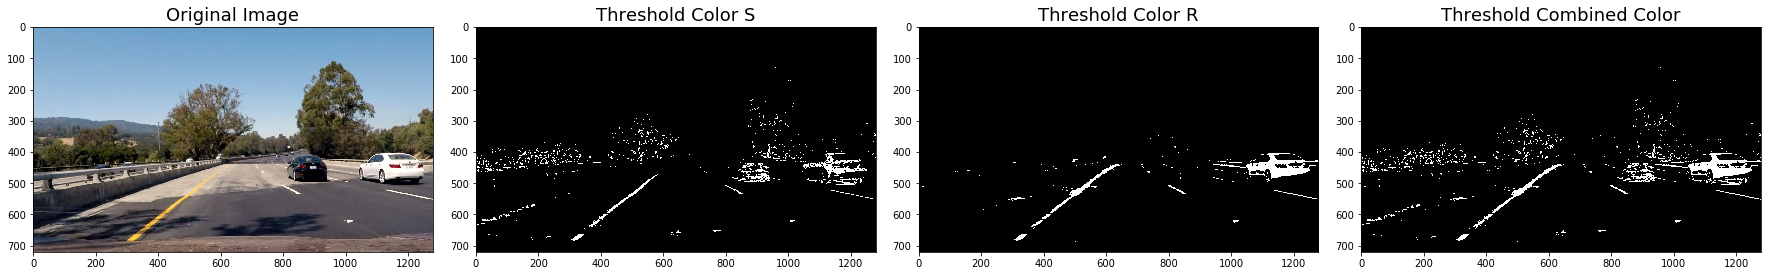

./test_images\test5.jpg


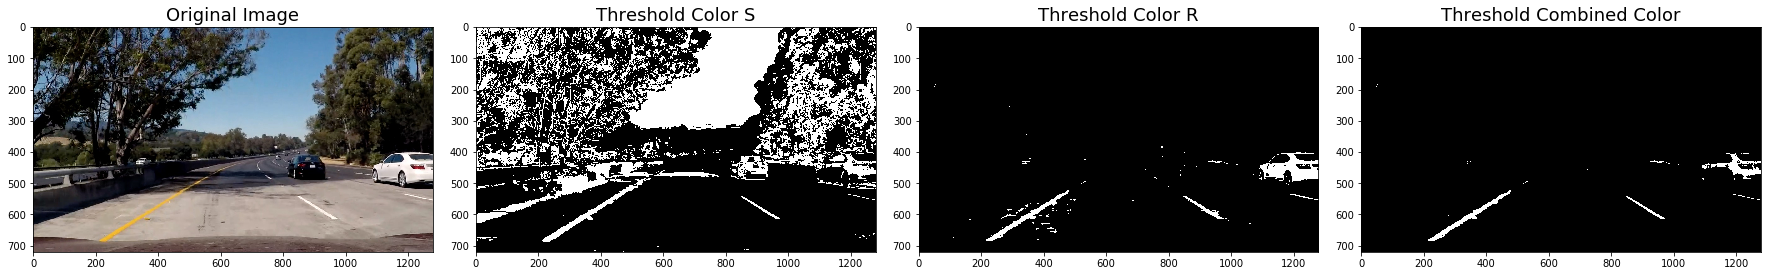

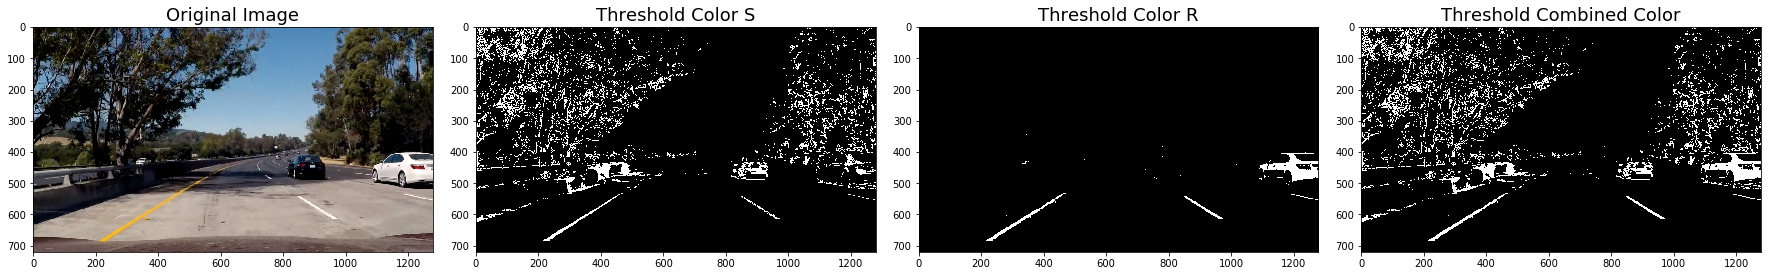

./test_images\test6.jpg


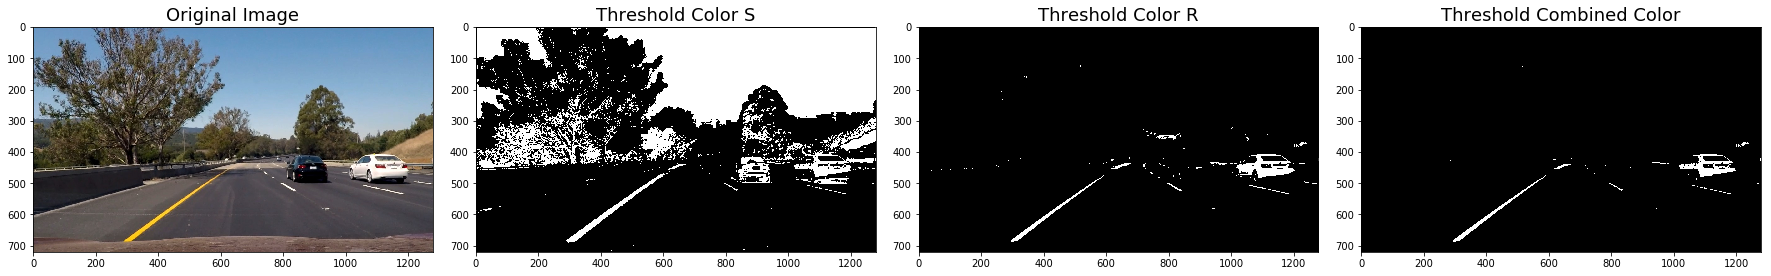

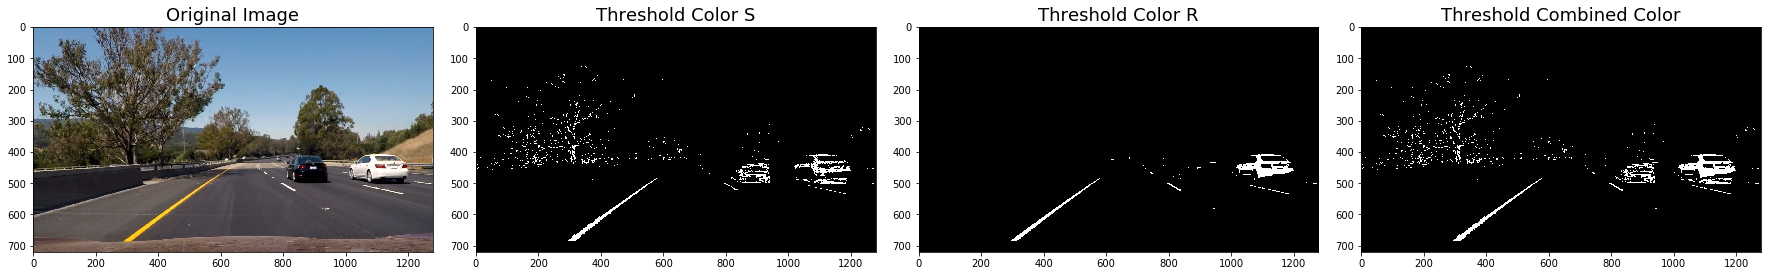

In [8]:
images = glob.glob('./test_images/*.jpg')
for fname in images:
   
    print(fname)

     #read image
    image = cv2.imread(fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Apply color threshold
    s_binary = hls_threshold(image, ch = 's', thresh = (80,255))
    h_binary = hls_threshold(image, ch = 'h', thresh = (10,30))
    l_binary = hls_threshold(image, ch = 'l', thresh = (180,255))
    
    r_binary = rgb_threshold(image, ch = 'r', thresh = (200,255))
    g_binary = rgb_threshold(image, ch = 'g', thresh = (150,255))
    b_binary = rgb_threshold(image, ch = 'b', thresh = (150,255))
        
    color_binary = np.zeros_like(s_binary)
    color_binary[(s_binary == 1) & (r_binary == 1)] = 1
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image',fontsize=18)
    ax2.imshow(s_binary, cmap='gray')
    ax2.set_title('Threshold Color S',fontsize=18)
    ax3.imshow(r_binary, cmap='gray')
    ax3.set_title('Threshold Color R',fontsize=18)
    ax4.imshow(color_binary, cmap='gray')
    ax4.set_title('Threshold Combined Color',fontsize=18)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    
    
        #Apply color threshold
    s_binary = hls_threshold(image, ch = 's', thresh = (180,255))    
    r_binary = rgb_threshold(image, ch = 'r', thresh = (220,255))
    
    color_binary = np.zeros_like(s_binary)
    color_binary[(s_binary == 1) | (r_binary == 1)] = 1
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image',fontsize=18)
    ax2.imshow(s_binary, cmap='gray')
    ax2.set_title('Threshold Color S',fontsize=18)
    ax3.imshow(r_binary, cmap='gray')
    ax3.set_title('Threshold Color R',fontsize=18)
    ax4.imshow(color_binary, cmap='gray')
    ax4.set_title('Threshold Combined Color',fontsize=18)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    
    
#     combined = np.zeros_like(gradx)
#     combined[(grad_binary == 1) | (color_binary == 1)] = 1
#     combined_src, src = draw_roi(combined, 'src')
    
#     f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
#     f.tight_layout()
#     ax1.imshow(h_binary, cmap='gray')
#     ax1.set_title('Threshold Color H',fontsize=18)
#     ax2.imshow(l_binary, cmap='gray')
#     ax2.set_title('Threshold Color L', fontsize=18)
#     ax3.imshow(g_binary, cmap='gray')
#     ax3.set_title('Threshold Color G',fontsize=18)
#     ax4.imshow(b_binary, cmap='gray')
#     ax4.set_title('Threshold Color B',fontsize=18)
#     plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#     plt.show()